<a href="https://colab.research.google.com/github/Kelzo8/AI/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import kagglehub
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


Preproccessing -Andrew

In [118]:
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("Path to dataset files:", path)

# Load CSV file
csv_path = f"{path}/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(csv_path)

Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2


Load csv file

In [119]:
df.drop(columns=['Person ID'], inplace=True)

Drop person ID column as we don't need it

In [120]:
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(bp_split[0], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(columns=['Blood Pressure'], inplace=True)

Split Blood Pressure into Systolic and Diastolic

In [121]:

categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

Encode all categorical variables

In [122]:
numerical_cols = ['Sleep Duration', 'Physical Activity Level', 'Stress Level',
                  'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']
X = df[numerical_cols].values  # Select only numerical columns for scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

Standardize all numerical features

In [123]:
correlation_matrix = df.corr()

Compute correlation matrix

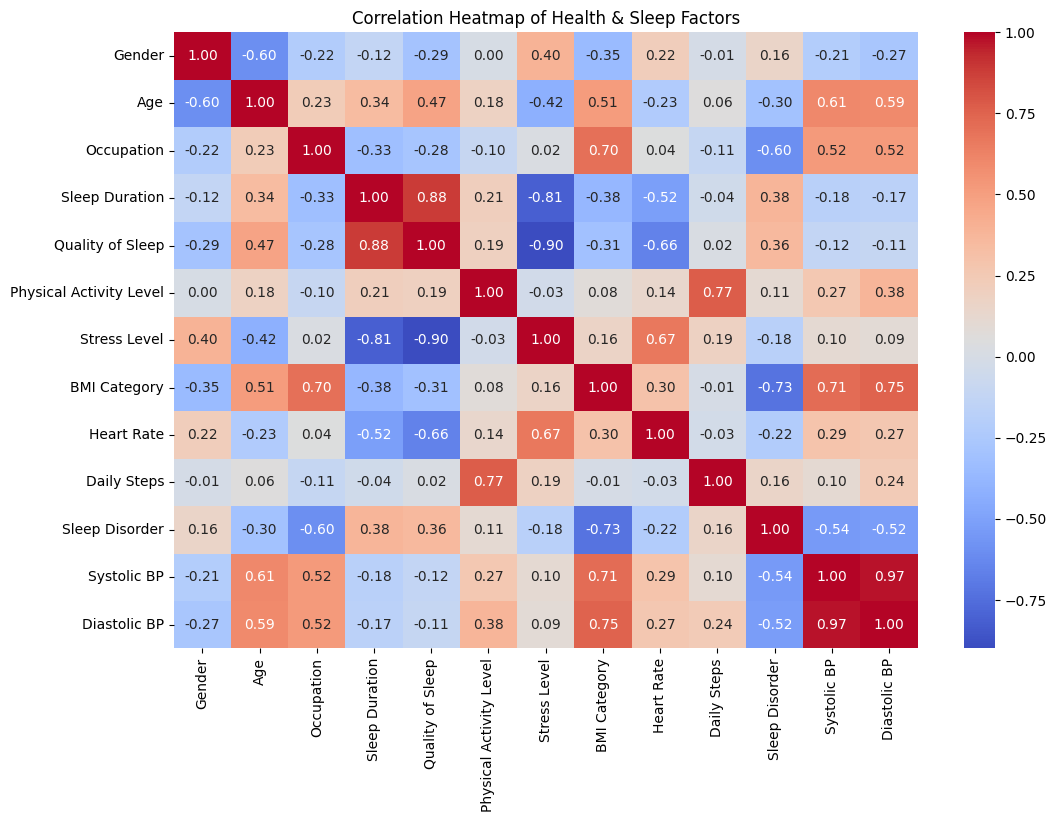

In [124]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Health & Sleep Factors')
plt.show()

In [125]:
df.to_csv('Processed_Sleep_Health_Dataset.csv', index=False)


In [126]:
correlation_matrix['Quality of Sleep'].sort_values(ascending=False)


,Quality of Sleep
Quality of Sleep,1.000000
Sleep Duration,0.883213
Age,0.473734
Sleep Disorder,0.357477
Physical Activity Level,0.192896
Daily Steps,0.016791
Diastolic BP,-0.110151
Systolic BP,-0.121632
Occupation,-0.278071
Gender,-0.291366


In [127]:
# Display dataset information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,2,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90


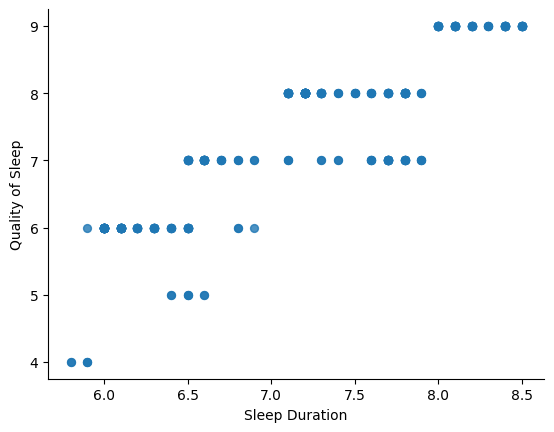

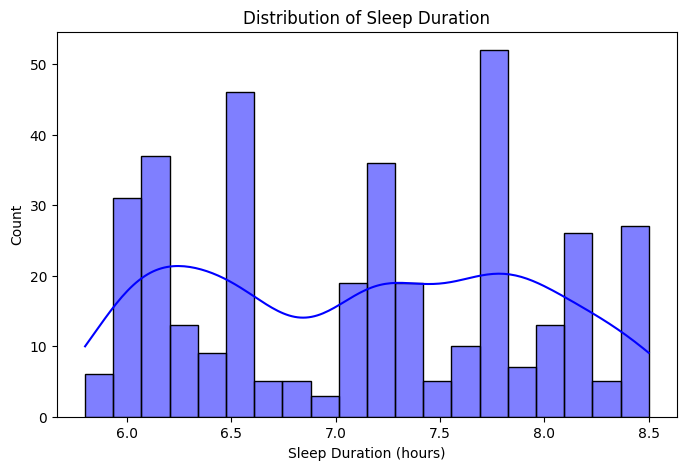

In [128]:
# Helps visualize whether sleep duration impacts sleep quality.
df.plot(kind='scatter', x='Sleep Duration', y='Quality of Sleep', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)

# Shows how sleep duration is distributed among individuals.
plt.figure(figsize=(8, 5))
sns.histplot(df["Sleep Duration"], bins=20, kde=True, color="blue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.show()

<ipython-input-129-24727e835453>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Stress Level", y="Sleep Duration", palette="coolwarm")


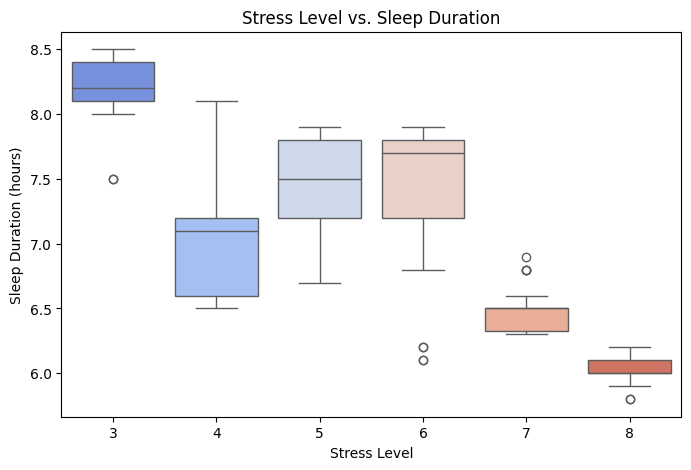

In [129]:
# Helps see how stress affects sleep duration.
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Stress Level", y="Sleep Duration", palette="coolwarm")
plt.title("Stress Level vs. Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

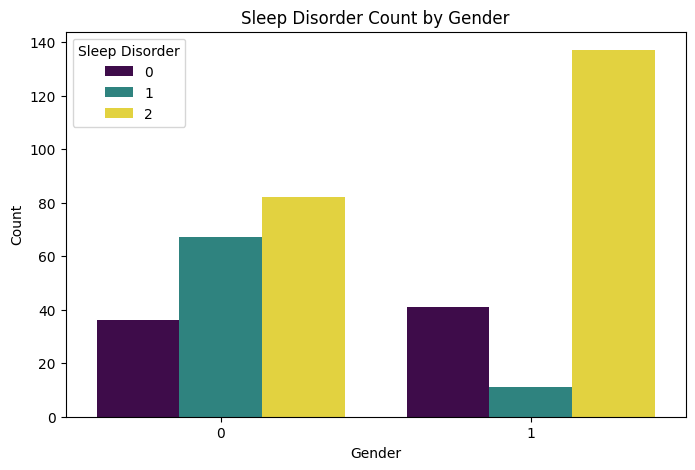

In [130]:
# Displays how sleep disorders vary between genders.
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Sleep Disorder", palette="viridis")
plt.title("Sleep Disorder Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()

In [131]:
# Encode categorical variables
label_enc = LabelEncoder()
df["Gender"] = label_enc.fit_transform(df["Gender"])
df["BMI Category"] = label_enc.fit_transform(df["BMI Category"])
df["Occupation"] = label_enc.fit_transform(df["Occupation"])

# Define features and target variable
X = df.drop(columns=["Quality of Sleep"]).values
y = df["Quality of Sleep"].values

In [132]:
# Scale features
scaler = StandardScaler()
df.info()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


MAE and RMSE are easy to interpret (lower = better).

R² Score is great for understanding overall model performance.

MAPE is useful when relative error matters more than absolute values.

If you need a single metric, use R² Score because it gives an intuitive sense of how well your model explains the data.

In [133]:
np.random.seed(42)
torch.manual_seed(42)
X = df.drop(columns=["Quality of Sleep"]).values
y = df["Quality of Sleep"].values.reshape(-1, 1)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch Tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# =================== AUTOENCODER FOR FEATURE EXTRACTION =================== #
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Train Autoencoder
input_dim = X_train_torch.shape[1]  # Automatically get the correct input size
autoencoder = Autoencoder(input_dim=input_dim)  # Now input_dim=12
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

def train_autoencoder(model, X_train, epochs=50):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        encoded, decoded = model(X_train)
        loss = criterion(decoded, X_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())  # Store loss per epoch
    return model.encoder, losses

# Train and capture loss
encoder, autoencoder_losses = train_autoencoder(autoencoder, X_train_torch)
X_train_encoded, _ = encoder(X_train_torch).detach(), encoder(X_test_torch).detach()

# =================== FT-TRANSFORMER MODEL =================== #
class FTTransformer(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super(FTTransformer, self).__init__()
        self.transformer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=4)
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        x = self.transformer(x.unsqueeze(1)).squeeze(1)
        return self.fc(x)

transformer_model = FTTransformer(input_dim=16)  # Encoded dimension
optimizer = optim.AdamW(transformer_model.parameters(), lr=0.001)
criterion = nn.MSELoss()

def train_transformer(model, X_train, y_train, epochs=100):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())  # Store loss per epoch
    return losses

# Train Transformer and capture loss
transformer_losses = train_transformer(transformer_model, X_train_encoded, y_train_torch)

# =================== XGBOOST ENSEMBLE =================== #
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.05)
xgb_model.fit(X_train_encoded.numpy(), y_train)

# =================== FINAL PREDICTIONS =================== #
X_test_encoded, _ = encoder(X_test_torch).detach(), encoder(X_test_torch).detach()

nn_preds = transformer_model(X_test_encoded).detach().numpy()
xgb_preds = xgb_model.predict(X_test_encoded.numpy())

# Ensemble: Weighted Average
final_preds = 0.6 * nn_preds + 0.4 * xgb_preds.reshape(-1, 1)

print("Final Predictions:", final_preds[:10])

Final Predictions: [[8.552716 ]
 [6.373633 ]
 [6.1751966]
 [8.679603 ]
 [6.0160637]
 [5.236677 ]
 [5.919856 ]
 [7.8342924]
 [8.427401 ]
 [7.768362 ]]


MAE and RMSE are easy to interpret (lower = better).

R² Score is great for understanding overall model performance.

MAPE is useful when relative error matters more than absolute values.

If you need a single metric, use R² Score because it gives an intuitive sense of how well your model explains the data.

In [134]:
# Convert y_test_torch to NumPy array
y_test_np = y_test_torch.numpy()

# Compute metrics using the final ensemble predictions
mae = mean_absolute_error(y_test_np, final_preds)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test_np, final_preds)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test_np, final_preds)
print(f"R² Score: {r2}")

# Define MAPE function to avoid division by zero issues
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, a_min=1e-8, a_max=None))) * 100

mape = mean_absolute_percentage_error(y_test_np, final_preds)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 0.3261776864528656
Mean Squared Error (MSE): 0.19452030956745148
Root Mean Squared Error (RMSE): 0.4410445664186914
R² Score: 0.8710609674453735
Mean Absolute Percentage Error (MAPE): 4.9319978803396225%


In [135]:
metrics_dict = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "MAPE"],
    "Value": [mae, mse, rmse, r2, mape]
}

metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

     Metric     Value
0       MAE  0.326178
1       MSE  0.194520
2      RMSE  0.441045
3  R² Score  0.871061
4      MAPE  4.931998


Used to check if your model makes mostly small errors or has large outliers.

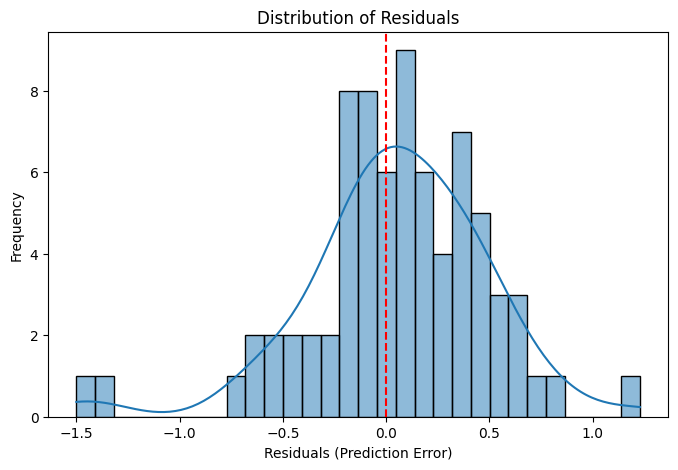

In [136]:
residuals = y_test_np - final_preds
plt.figure(figsize=(8, 5))
sns.histplot(residuals.flatten(), bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel("Residuals (Prediction Error)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


Shows which features are most important for predictions.


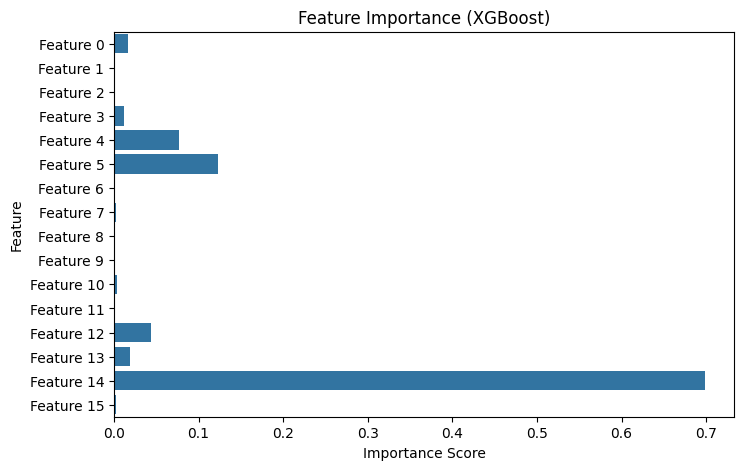

In [137]:
import xgboost as xgb
import pandas as pd

# Get feature importances
feature_importance = xgb_model.feature_importances_
feature_names = [f"Feature {i}" for i in range(len(feature_importance))]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (XGBoost)")
plt.show()


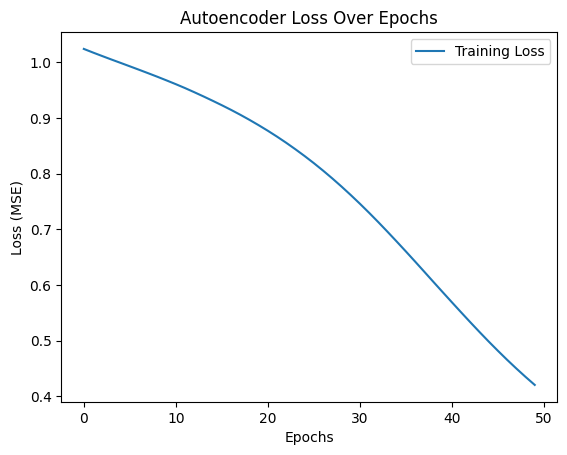

In [138]:
plt.plot(autoencoder_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Autoencoder Loss Over Epochs')
plt.legend()
plt.show()


If points align closely to the red line, predictions are accurate.

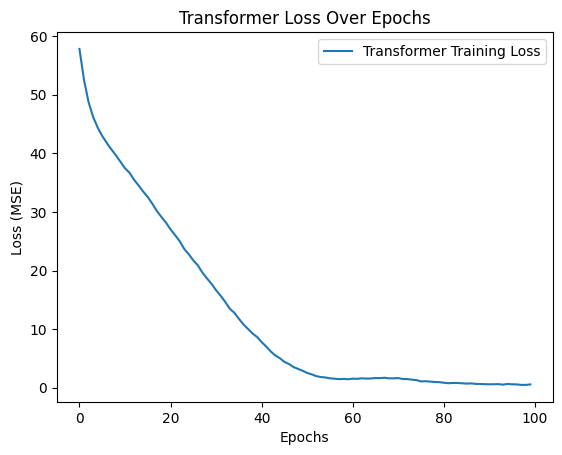

In [139]:
plt.plot(transformer_losses, label='Transformer Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Transformer Loss Over Epochs')
plt.legend()
plt.show()

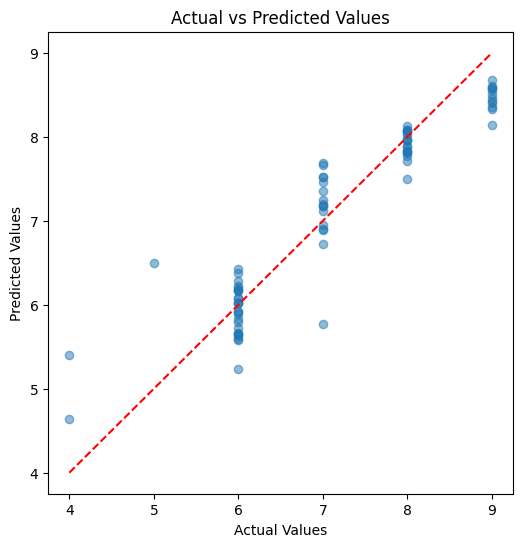

In [140]:
# Ensure y_test is NumPy array
y_test_np = y_test_torch.numpy()

# Scatter Plot for Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_np, final_preds, alpha=0.5)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--') # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


A bell-shaped curve means normal residuals (good).

 Skewed or multi-peaked distributions might indicate bias.

This helps visualize how errors (residuals) are distributed.

A random scatter means the model is unbiased.

Patterns could indicate systematic errors.

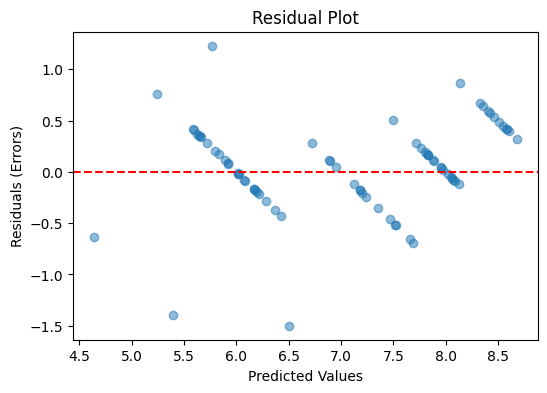

In [141]:
# Flatten both arrays to 1D
final_preds_1d = final_preds.flatten()
y_test_np_1d = y_test_np.flatten()

# Compute residuals
residuals = y_test_np_1d - final_preds_1d

# Plot Residuals
plt.figure(figsize=(6,4))
plt.scatter(final_preds_1d, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot')
plt.show()


In [142]:
# Cell 1: Load the trained scaler
scaler = StandardScaler()
scaler.fit(X)  # Ensure X is your full dataset (excluding target)


StandardScaler()

In [143]:
# Cell 2: Function to handle optional inputs
def get_optional_input(prompt, dtype=float):
    user_input = input(prompt)
    return dtype(user_input) if user_input.strip() else None


In [144]:
# Cell 3: Function to display messages in a formatted way with modern styling
def display_message(message, color="black", font_size="16px", weight="normal"):
    display(HTML(f"<div style='background-color:#f1f1f1; padding:10px; border-radius:5px; font-size:{font_size}; font-weight:{weight}; color:{color};'>{message}</div>"))


In [145]:
class SleepQualityNN(nn.Module):
    def __init__(self, input_dim):
        super(SleepQualityNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.BatchNorm1d(64),

            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.BatchNorm1d(32),

            nn.Linear(32, 16),
            nn.LeakyReLU(),
            nn.BatchNorm1d(16),

            nn.Linear(16, 1)  # Final output layer
        )

    def forward(self, x):
        return self.model(x)

In [146]:
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()

    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f}")

In [147]:
# ===================== DATA PREPARATION ===================== #
batch_size = 32  # Mini-batch training
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ===================== MODEL TRAINING ===================== #
input_dim = X_train_torch.shape[1]  # Get input feature count
model = SleepQualityNN(input_dim)

criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer, epochs=100)


Epoch 1/100 | Loss: 526.0182
Epoch 2/100 | Loss: 513.5323
Epoch 3/100 | Loss: 504.4353
Epoch 4/100 | Loss: 507.7792
Epoch 5/100 | Loss: 497.3563
Epoch 6/100 | Loss: 493.8400
Epoch 7/100 | Loss: 484.2729
Epoch 8/100 | Loss: 480.6325
Epoch 9/100 | Loss: 462.9048
Epoch 10/100 | Loss: 450.2834
Epoch 11/100 | Loss: 444.8265
Epoch 12/100 | Loss: 428.5588
Epoch 13/100 | Loss: 420.4165
Epoch 14/100 | Loss: 409.2312
Epoch 15/100 | Loss: 395.0779
Epoch 16/100 | Loss: 375.4732
Epoch 17/100 | Loss: 361.8830
Epoch 18/100 | Loss: 348.9348
Epoch 19/100 | Loss: 333.2719
Epoch 20/100 | Loss: 313.7731
Epoch 21/100 | Loss: 294.6043
Epoch 22/100 | Loss: 279.3179
Epoch 23/100 | Loss: 264.7952
Epoch 24/100 | Loss: 245.9758
Epoch 25/100 | Loss: 232.1981
Epoch 26/100 | Loss: 210.4028
Epoch 27/100 | Loss: 196.6802
Epoch 28/100 | Loss: 184.1274
Epoch 29/100 | Loss: 166.8215
Epoch 30/100 | Loss: 154.6322
Epoch 31/100 | Loss: 141.5306
Epoch 32/100 | Loss: 129.7104
Epoch 33/100 | Loss: 114.0797
Epoch 34/100 | Loss

In [148]:
# Cell 6: Function to predict sleep quality using the trained model
def predict_sleep_quality(features):
    # Ensure that user input has the correct number of features (12)
    if len(features) < 12:
        features += [None] * (12 - len(features))

    user_input = np.array([features], dtype=float)

    # Handle missing values using mean imputation
    user_input = np.where(np.isnan(user_input), np.nanmean(X, axis=0), user_input)

    # Standardize input
    user_input_scaled = scaler.transform(user_input)

    # Convert to PyTorch tensor
    user_input_torch = torch.tensor(user_input_scaled, dtype=torch.float32)

    # Encode features using trained autoencoder (only getting the encoded part)
    encoded_input = encoder(user_input_torch).detach()

    # Get predictions from both models
    nn_pred = transformer_model(encoded_input).detach().numpy()
    xgb_pred = xgb_model.predict(encoded_input.numpy())

    # Weighted ensemble prediction
    final_prediction = 0.6 * nn_pred + 0.4 * xgb_pred.reshape(-1, 1)

    return final_prediction[0][0]  # Return single value


In [154]:
# Cell 7: User input widgets
display_message("<b>🔹 Enter Your Details:</b> <i>(Leave blank to skip any question)</i>", color="darkblue", font_size="18px", weight="bold")

def create_input_field(prompt, field_type=float):
    return widgets.FloatText(
        description=prompt,
        value=None,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='80%'),
        continuous_update=False
    )

sleep_duration_widget = create_input_field("Hours Slept: ")
exercise_level_widget = create_input_field("Exercise Level (0-10): ")
stress_level_widget = create_input_field("Stress Level (1-10): ")

gender_widget = widgets.Dropdown(
    options=['Female', 'Male', 'Other'],
    description='Gender:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)
age_widget = create_input_field("Age: ")
occupation_widget = widgets.Dropdown(
    options=['Sedentary', 'Active'],
    description='Occupation:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)
bmi_category_widget = widgets.Dropdown(
    options=['Underweight', 'Normal', 'Overweight', 'Obese'],
    description='BMI Category:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)
heart_rate_widget = create_input_field("Heart Rate (bpm): ")
daily_steps_widget = create_input_field("Daily Steps: ")
sleep_disorder_widget = widgets.Checkbox(
    value=False,
    description="Do you have a sleep disorder?",
    style={'description_width': 'initial'}
)
systolic_bp_widget = create_input_field("Systolic BP (mmHg): ")
diastolic_bp_widget = create_input_field("Diastolic BP (mmHg): ")

display(sleep_duration_widget, exercise_level_widget, stress_level_widget,
        gender_widget, age_widget, occupation_widget, bmi_category_widget,
        heart_rate_widget, daily_steps_widget, sleep_disorder_widget,
        systolic_bp_widget, diastolic_bp_widget)


FloatText(value=0.0, description='Hours Slept: ', layout=Layout(width='80%'), style=DescriptionStyle(descripti…

FloatText(value=0.0, description='Exercise Level (0-10): ', layout=Layout(width='80%'), style=DescriptionStyle…

FloatText(value=0.0, description='Stress Level (1-10): ', layout=Layout(width='80%'), style=DescriptionStyle(d…

Dropdown(description='Gender:', layout=Layout(width='80%'), options=('Female', 'Male', 'Other'), style=Descrip…

FloatText(value=0.0, description='Age: ', layout=Layout(width='80%'), style=DescriptionStyle(description_width…

Dropdown(description='Occupation:', layout=Layout(width='80%'), options=('Sedentary', 'Active'), style=Descrip…

Dropdown(description='BMI Category:', layout=Layout(width='80%'), options=('Underweight', 'Normal', 'Overweigh…

FloatText(value=0.0, description='Heart Rate (bpm): ', layout=Layout(width='80%'), style=DescriptionStyle(desc…

FloatText(value=0.0, description='Daily Steps: ', layout=Layout(width='80%'), style=DescriptionStyle(descripti…

Checkbox(value=False, description='Do you have a sleep disorder?', style=DescriptionStyle(description_width='i…

FloatText(value=0.0, description='Systolic BP (mmHg): ', layout=Layout(width='80%'), style=DescriptionStyle(de…

FloatText(value=0.0, description='Diastolic BP (mmHg): ', layout=Layout(width='80%'), style=DescriptionStyle(d…

In [150]:
# Cell 8: Capture user inputs
def capture_user_inputs():
    features = [
        sleep_duration_widget.value,
        exercise_level_widget.value,
        stress_level_widget.value,
        gender_widget.index,
        age_widget.value,
        occupation_widget.index,
        bmi_category_widget.index,
        heart_rate_widget.value,
        daily_steps_widget.value,
        sleep_disorder_widget.value,
        systolic_bp_widget.value,
        diastolic_bp_widget.value
    ]
    return features


In [151]:
# Cell 9: Trigger prediction and display recommendations
def on_predict_button_click(b):
    features = capture_user_inputs()
    predicted_quality = predict_sleep_quality(features)

    display_message(f"<b>🛏️ Predicted Sleep Quality Score:</b> <span style='color:green; font-size:18px'>{predicted_quality:.2f} / 10</span>", color="green")

    if predicted_quality < 4:
        display_message("<b>⚠️ Your sleep quality is quite low! Consider:</b>", color="red", font_size="16px", weight="bold")
        display_message("- Sleeping at least 7-9 hours.", color="red")
        display_message("- Reducing stress through meditation or relaxation.", color="red")
        display_message("- Avoiding caffeine or screens before bed.", color="red")
        if stress_level_widget.value and stress_level_widget.value > 7:
            display_message("- Consider stress-reducing activities like yoga or journaling.", color="red")
        if daily_steps_widget.value and daily_steps_widget.value < 5000:
            display_message("- Try to walk at least 5,000+ steps daily for better sleep.", color="red")
    elif 4 <= predicted_quality < 7:
        display_message("<b>🔹 Your sleep quality is moderate. To improve:</b>", color="orange", font_size="16px", weight="bold")
        display_message("- Maintain a consistent sleep schedule.", color="orange")
        display_message("- Engage in regular physical activity (but not right before bed).", color="orange")
        display_message("- Try breathing exercises to manage stress.", color="orange")
        if bmi_category_widget.index in [2, 3]:
            display_message("- Your BMI suggests weight management might improve sleep.", color="orange")
        if systolic_bp_widget.value and systolic_bp_widget.value > 140:
            display_message("- Your systolic blood pressure is high. Consider consulting a healthcare professional.", color="orange")
    else:
        display_message("<b>✅ Your sleep quality looks good! Keep up your healthy habits:</b>", color="blue", font_size="16px", weight="bold")
        display_message("- Continue your exercise routine.", color="blue")
        display_message("- Maintain a stress-free evening routine.", color="blue")


In [152]:
# Cell 10: Prediction button
predict_button = widgets.Button(description="Predict Sleep Quality",
                                style={'button_color': '#4CAF50', 'font_weight': 'bold', 'font_size': '16px'})
predict_button.on_click(on_predict_button_click)

display(predict_button)


Button(description='Predict Sleep Quality', style=ButtonStyle(button_color='#4CAF50', font_weight='bold'))

In [153]:
# Create widgets
sleep_duration_slider = widgets.FloatSlider(min=0, max=24, step=0.5, value=8, description="Sleep (hrs):")
exercise_level_slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=5, description="Exercise Level:")
stress_level_slider = widgets.FloatSlider(min=1, max=10, step=0.1, value=5, description="Stress Level:")

# Function to update and display the prediction when sliders change
def update_prediction(sleep_duration, exercise_level, stress_level):
    prediction = predict_sleep_quality(sleep_duration, exercise_level, stress_level)
    print(f"Predicted Sleep Quality: {prediction:.2f}")

# Display the widgets
widgets.interactive(update_prediction,
                    sleep_duration=sleep_duration_slider,
                    exercise_level=exercise_level_slider,
                    stress_level=stress_level_slider)


interactive(children=(FloatSlider(value=8.0, description='Sleep (hrs):', max=24.0, step=0.5), FloatSlider(valu…